# Healthcare Insurance Analysis

### Submitted by- Hrishikesh Rameakar

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
hospital_details=pd.read_csv("Hospitalisation details.csv")
medical_exam=pd.read_csv("Medical Examinations.csv")
names=pd.read_excel("Names.xlsx")

In [3]:
hospital_details.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [4]:
medical_exam.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [5]:
names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [6]:
names.shape

(2335, 2)

In [7]:
medical_exam.shape

(2335, 8)

In [8]:
hospital_details.shape

(2343, 9)

### To merge the data frames we can do it on Customer ID column as they are common in all
1. we will have to merge names and medical exam first then the hospital details because as we can see the hospital details DF is in reverse order so we will have to reverse the rows first them merge it

In [9]:
new_data=pd.merge(hospital_details,medical_exam, on='Customer ID',how='outer')
new_data

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes


In [10]:
## now we can merge the hospital details DF with the other DF
final_hospital_df=pd.merge(new_data,names,on='Customer ID',how='outer')
final_hospital_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"


In [11]:
final_hospital_df=final_hospital_df.loc[::-1]

In [12]:
final_hospital_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
2342,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"


In [13]:
final_hospital_df=final_hospital_df.reset_index(drop=True)

In [14]:
final_hospital_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id1,1968,Oct,12,0,63770.43,tier - 1,tier - 3,R1013,47.410,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
1,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
2,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
3,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
4,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
2339,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
2340,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
2341,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"


### 2. Check for missing values in the dataset

In [15]:
final_hospital_df.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       8
HBA1C                     8
Heart Issues              8
Any Transplants           8
Cancer history            8
NumberOfMajorSurgeries    8
smoker                    8
name                      8
dtype: int64

In [16]:
final_hospital_df.isnull().sum()/len(final_hospital_df)*100

Customer ID               0.000000
year                      0.000000
month                     0.000000
date                      0.000000
children                  0.000000
charges                   0.000000
Hospital tier             0.000000
City tier                 0.000000
State ID                  0.000000
BMI                       0.341443
HBA1C                     0.341443
Heart Issues              0.341443
Any Transplants           0.341443
Cancer history            0.341443
NumberOfMajorSurgeries    0.341443
smoker                    0.341443
name                      0.341443
dtype: float64

### We can see that 8 columns have missing values in the dataset which is even lesser than 1% so we can remove the missing values as we cannot properly fill in missing values for health section as it will be wrongly diagnosed    

In [17]:
final_hospital_df.shape

(2343, 17)

In [18]:
final_hospital_df.dropna(inplace=True)

In [19]:
final_hospital_df.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

In [20]:
final_hospital_df.shape

(2335, 17)

### 3. Find the percentage of rows that have trivial value (for example, ?), anddelete such rows if they do not contain significant information

In [21]:
trivial_value= final_hospital_df[final_hospital_df.eq("?").any(1)]
trivial_value

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
2,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
169,Id170,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes,"Torphy, Mr. Bobby"
561,Id560,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,?,"Pearlman, Mr. Oz"
636,Id635,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,?,"Bruns, Mr. Zachary T"
1287,Id1286,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.370,8.01,yes,No,No,1,No,"Ainsley, Ms. Katie M."
1290,Id1289,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.320,11.56,yes,No,No,1,No,"Levine, Ms. Annie J."
1794,Id1793,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No,"Capriolo, Mr. Michael"
2325,Id2318,1996,?,18,0,770.38,tier - 3,?,R1012,18.820,5.51,yes,No,No,No major surgery,No,"Gagnon, Ms. Candice M"
2329,Id2322,2002,?,19,0,750.00,tier - 3,tier - 1,R1012,21.380,8.01,No,No,No,No major surgery,No,"Street, Ms. Holly"
2331,Id2324,1999,Dec,26,0,700.00,?,tier - 3,R1013,22.240,5.04,No,No,No,No major surgery,No,"Duffy, Ms. Meghan K"


In [22]:
trivial_value.shape

(10, 17)

In [23]:
round(trivial_value.shape[0]/final_hospital_df.shape[0]*100,2)

0.43

#### There is total 0.43% of rows contain the trivial values.

In [24]:
# Now lets drop the all row that contain the trivial values in the data set.
final_hospital_df.drop(final_hospital_df[final_hospital_df.eq("?").any(1)].index, axis=0, inplace=True)

In [25]:
final_hospital_df.shape

(2325, 17)

### 4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset

In [26]:
df_categorical=final_hospital_df.select_dtypes(exclude='number')
df_categorical.head()

,Customer ID,year,month,Hospital tier,City tier,State ID,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id1,1968,Oct,tier - 1,tier - 3,R1013,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
1,Id2,1977,Jun,tier - 2,tier - 3,R1013,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
3,Id4,1991,Jun,tier - 1,tier - 3,R1024,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
4,Id5,1989,Jun,tier - 1,tier - 2,R1012,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
5,Id6,1962,Aug,tier - 1,tier - 3,R1011,No,No,No,No major surgery,yes,"Baker, Mr. Russell B."


In [27]:
final_hospital_df['month'].value_counts()

Sep    368
Aug    342
Dec    340
Jul    339
Oct    333
Nov    316
Jun    287
Name: month, dtype: int64

In [28]:
final_hospital_df['Hospital tier'].value_counts()

tier - 2    1334
tier - 3     691
tier - 1     300
Name: Hospital tier, dtype: int64

In [29]:
final_hospital_df['City tier'].value_counts()

tier - 2    807
tier - 3    789
tier - 1    729
Name: City tier, dtype: int64

In [30]:
final_hospital_df['State ID'].value_counts()

R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: State ID, dtype: int64

In [31]:
final_hospital_df['Heart Issues'].value_counts()

No     1405
yes     920
Name: Heart Issues, dtype: int64

In [32]:
final_hospital_df['Any Transplants'].value_counts()

No     2183
yes     142
Name: Any Transplants, dtype: int64

In [33]:
final_hospital_df['Cancer history'].value_counts()

No     1934
Yes     391
Name: Cancer history, dtype: int64

In [34]:
final_hospital_df['NumberOfMajorSurgeries'].value_counts()

No major surgery    1070
1                    961
2                    272
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

In [35]:
final_hospital_df['smoker'].value_counts()

No     1839
yes     486
Name: smoker, dtype: int64

In [36]:
df_categorical.head()

,Customer ID,year,month,Hospital tier,City tier,State ID,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id1,1968,Oct,tier - 1,tier - 3,R1013,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
1,Id2,1977,Jun,tier - 2,tier - 3,R1013,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
3,Id4,1991,Jun,tier - 1,tier - 3,R1024,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
4,Id5,1989,Jun,tier - 1,tier - 2,R1012,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
5,Id6,1962,Aug,tier - 1,tier - 3,R1011,No,No,No,No major surgery,yes,"Baker, Mr. Russell B."


In [37]:
# We have some categorical values so first of all we will transform then by using the label encoder.
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
final_hospital_df["Heart Issues"] = le.fit_transform(final_hospital_df["Heart Issues"])
final_hospital_df["Any Transplants"] = le.fit_transform(final_hospital_df["Any Transplants"])
final_hospital_df["Cancer history"] = le.fit_transform(final_hospital_df["Cancer history"])
final_hospital_df["smoker"] = le.fit_transform(final_hospital_df["smoker"])

In [40]:
final_hospital_df['smoker'].value_counts()

0    1839
1     486
Name: smoker, dtype: int64

In [41]:
final_hospital_df['month'].unique()

array(['Oct', 'Jun', 'Aug', 'Sep', 'Dec', 'Jul', 'Nov'], dtype=object)

In [42]:
### As we saw above that there are 7 months in the months column we will map them in the a numerical sequence
final_hospital_df['month']=final_hospital_df['month'].map({'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [43]:
final_hospital_df['month'].unique()

array([10,  6,  8,  9, 12,  7, 11], dtype=int64)

#### Now we will transform the ordinal variables: Hospital tier and City tier

In [44]:
def ordinal_variable(val):
    return int(val.replace("tier", "").replace(" ", "").replace("-", ""))

In [45]:
final_hospital_df['Hospital tier']=final_hospital_df['Hospital tier'].map(ordinal_variable)
final_hospital_df['City tier']=final_hospital_df['City tier'].map(ordinal_variable)

In [46]:
final_hospital_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id1,1968,10,12,0,63770.43,1,3,R1013,47.410,7.47,0,0,0,No major surgery,1,"Hawks, Ms. Kelly"
1,Id2,1977,6,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,No major surgery,1,"Lehner, Mr. Matthew D"
3,Id4,1991,6,6,1,58571.07,1,3,R1024,38.095,6.05,0,0,0,No major surgery,1,"Osborne, Ms. Kelsey"
4,Id5,1989,6,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,No major surgery,1,"Kadala, Ms. Kristyn"
5,Id6,1962,8,4,0,52590.83,1,3,R1011,32.800,6.59,0,0,0,No major surgery,1,"Baker, Mr. Russell B."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,Id2331,1998,7,27,0,637.26,3,3,R1013,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan"
2339,Id2332,1992,9,13,0,604.54,3,3,R1013,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr."
2340,Id2333,1993,6,30,0,600.00,2,1,R1013,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie"
2341,Id2334,1992,11,30,0,570.62,2,1,R1013,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P"


### 5.The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.

In [47]:
final_hospital_df['State ID'].value_counts()/len(final_hospital_df)*100

R1013    26.193548
R1011    24.688172
R1012    24.602151
R1024     6.838710
R1026     3.612903
R1021     3.010753
R1016     2.752688
R1025     1.720430
R1023     1.634409
R1017     1.548387
R1019     1.118280
R1022     0.602151
R1014     0.559140
R1015     0.473118
R1018     0.387097
R1020     0.258065
Name: State ID, dtype: float64

As we can see only R1011, R1012 AND R1013 are worth investigating further. 

In [48]:
df_copy=final_hospital_df[final_hospital_df['State ID'].isin(['R1011','R1012','R1013'])]
df_copy.shape

(1755, 17)

In [49]:
df_copy['State ID']=le.fit_transform(df_copy['State ID'])

In [50]:
df_copy['State ID'].unique()

array([2, 1, 0])

### 6.The variable NumberOfMajorSurgeries also appears to have string values. Apply asuitable method to clean up this variable.

In [51]:
df_copy['NumberOfMajorSurgeries'].value_counts()

No major surgery    816
1                   713
2                   208
3                    18
Name: NumberOfMajorSurgeries, dtype: int64

The Number Of Major Surgeries variable contain string value 'no major Surgery' that means 0
surgery. So we will replace this value into int value equal to zero.

In [52]:
df_copy['NumberOfMajorSurgeries'].replace('No major surgery',0,inplace=True)

In [53]:
df_copy['NumberOfMajorSurgeries'].value_counts()

0    816
1    713
2    208
3     18
Name: NumberOfMajorSurgeries, dtype: int64

### 7.Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [54]:
from datetime import datetime

In [55]:
df_copy['date'].dtypes

dtype('int64')

In [56]:
## we will create a column DOB by concatenating year month and date columns
df_copy['DOB']=df_copy['year']+' '+df_copy['month'].astype(str)+' '+df_copy['date'].astype(str)

In [57]:
df_copy['DOB']=pd.to_datetime(df_copy['DOB'])

In [58]:
df_copy['Age']=(datetime.now()-df_copy['DOB']).apply(lambda x: x.days/365).astype(int)

## we will drop the DOB column as it will be dificult to compute 1-1-1 value for modeling 
df_copy.drop(columns=['DOB'],axis=1,inplace=True)

In [59]:
df_copy

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age
0,Id1,1968,10,12,0,63770.43,1,3,2,47.41,7.47,0,0,0,0,1,"Hawks, Ms. Kelly",54
1,Id2,1977,6,8,0,62592.87,2,3,2,30.36,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D",45
4,Id5,1989,6,19,0,55135.40,1,2,1,35.53,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn",33
5,Id6,1962,8,4,0,52590.83,1,3,0,32.80,6.59,0,0,0,0,1,"Baker, Mr. Russell B.",60
6,Id7,1994,10,27,1,51194.56,1,3,0,36.40,6.07,0,0,0,0,1,"Macpherson, Mr. Scott",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,Id2331,1998,7,27,0,637.26,3,3,2,22.34,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",24
2339,Id2332,1992,9,13,0,604.54,3,3,2,17.70,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",30
2340,Id2333,1993,6,30,0,600.00,2,1,2,16.47,6.35,0,0,1,1,0,"Albano, Ms. Julie",29
2341,Id2334,1992,11,30,0,570.62,2,1,2,17.60,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",30


### 8.The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

The salutation (Ms.) denote the female and (Mr.) denote the male. The gender plays an important role to predict the hospitalization cost so for model building we directly denote the gender by int values as Male = 0 & Female = 1

In [60]:
df_copy['Gender']=['0' if 'Mr.' in name else '1' for name in df_copy['name']]
df_copy.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age,Gender
0,Id1,1968,10,12,0,63770.43,1,3,2,47.41,7.47,0,0,0,0,1,"Hawks, Ms. Kelly",54,1
1,Id2,1977,6,8,0,62592.87,2,3,2,30.36,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D",45,0
4,Id5,1989,6,19,0,55135.40,1,2,1,35.53,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn",33,1
5,Id6,1962,8,4,0,52590.83,1,3,0,32.80,6.59,0,0,0,0,1,"Baker, Mr. Russell B.",60,0
6,Id7,1994,10,27,1,51194.56,1,3,0,36.40,6.07,0,0,0,0,1,"Macpherson, Mr. Scott",28,0


### 9.You should also visualize the distribution of costs using a histogram, box and whisker plot,and swarm plot.

### Histogram

<AxesSubplot:xlabel='charges', ylabel='Count'>

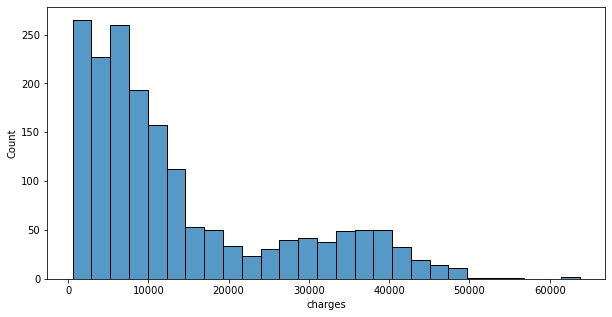

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(df_copy['charges'])

### Box Plot / Whisker Plot 

<AxesSubplot:xlabel='charges'>

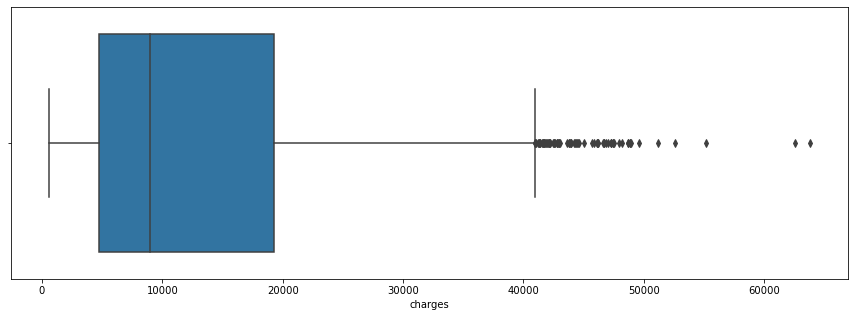

In [62]:
plt.figure(figsize=(15,5))
sns.boxplot(df_copy['charges'])

### Swarm Plot

<AxesSubplot:xlabel='charges'>

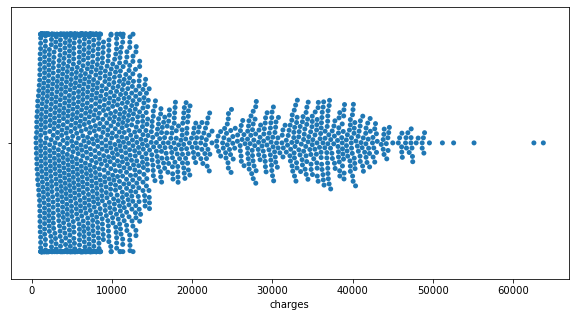

In [63]:
plt.figure(figsize=(10,5))
sns.swarmplot(df_copy['charges'])

### 10. State how the distribution is different across gender and tiers of hospitals

Text(0.5, 1.0, 'Distribution of data by Hospital tier and Gender')

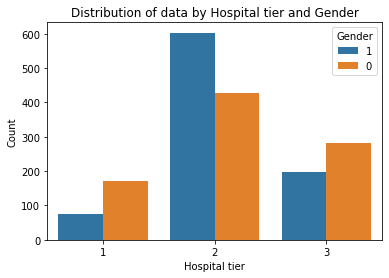

In [64]:
sns.countplot(x='Hospital tier',hue='Gender',data=df_copy)
plt.xlabel('Hospital tier')
plt.ylabel('Count')
plt.title("Distribution of data by Hospital tier and Gender")

### 11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [65]:
pd.set_option('display.max_rows',None)
df_copy[['charges','Hospital tier']]

,charges,Hospital tier
0,63770.43,1
1,62592.87,2
4,55135.40,1
5,52590.83,1
6,51194.56,1
7,49577.66,2
8,48970.25,1
9,48885.14,1
10,48824.45,2
11,48675.52,1


In [66]:
df_copy['charges'].unique()

array([63770.43, 62592.87, 55135.4 , ...,   600.  ,   570.62,   563.84])

### 12.Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals.

In [67]:
## To make the frequency table we will use pd.crosstab  
freq_table=pd.crosstab(df_copy['Hospital tier'],'Count Of People')
freq_table

col_0,Count Of People
Hospital tier,
1,244
2,1030
3,481


<AxesSubplot:xlabel='City tier', ylabel='Count'>

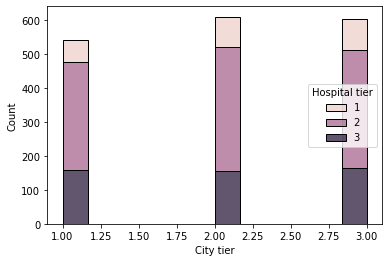

In [68]:
# we will noe create the stacked bar chart
sns.histplot(df_copy,x='City tier' ,hue ='Hospital tier',multiple='stack')

### 13. Test the following null hypotheses:
a. The average hospitalization costs for the three types of hospitals are not significantly different


b. The average hospitalization costs for the three types of cities are not significantly different


c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers


d. Smoking and heart issues are independent

In [69]:
import scipy.stats as stats

print('Null Hypothesis => Average hospitalization costs for the three types of hospitals are not significantly different.')

# Perform ANOVA test using the `charges` column and grouping by the `Hospital tier` column
f_val, p_val = stats.f_oneway(df_copy[df_copy['Hospital tier'] == 'tier - 1']['charges'],
                              df_copy[df_copy['Hospital tier'] == 'tier - 2']['charges'],
                              df_copy[df_copy['Hospital tier'] == 'tier - 3']['charges'])

# Print the p-value
print('P-value :',p_val)

# Compare p-value with significance value(0.05)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Null Hypothesis => Average hospitalization costs for the three types of hospitals are not significantly different.
P-value : nan
Accept null hypothesis


#### b.The average hospitalization costs for the three types of cities are not significantly different.

In [70]:
print('Null Hypothesis => Average hospitalization costs for the three types of cities are not significantly different.')
# Perform ANOVA test using the `charges` column and grouping by the `City tier` column
f_val, p_val = stats.f_oneway(df_copy[df_copy['City tier'] == 'tier - 1']['charges'],
                              df_copy[df_copy['City tier'] == 'tier - 2']['charges'],
                              df_copy[df_copy['City tier'] == 'tier - 3']['charges'])

# Print the p-value
print('P-value :',p_val)

# Compare p-value with significance value(0.05)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Null Hypothesis => Average hospitalization costs for the three types of cities are not significantly different.
P-value : nan
Accept null hypothesis


#### c.The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.

In [71]:
print('Null Hypothesis => Average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.')
# Perform ANOVA test using the `charges` column and grouping by the `smoker` column
t_val, p_val = stats.ttest_ind(df_copy[df_copy['smoker'] == 'yes']['charges'],
                              df_copy[df_copy['smoker'] == 'No']['charges'])

# Print the p-value
print('P-value :',p_val)

# Compare p-value with significance value(0.05)
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Null Hypothesis => Average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.
P-value : nan
Accept null hypothesis


#### d.Smoking and heart issues are independent

In [72]:
from scipy.stats import chi2_contingency

# create a contingency table of the observed counts
contingency_table = pd.crosstab(df_copy['smoker'], df_copy['Heart Issues'])

# conduct the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'P-value = {p}')
# interpret the p-value
if p < 0.05:
    print("Reject the null hypothesis, Smoking and heart issues are independent.")
else:
    print("Accept null hypothesis, Smoking and heart issues are independent.")

P-value = 0.9107065371179246
Accept null hypothesis, Smoking and heart issues are independent.


## Project Task: Week 2

## Machine Learning

### 1. Examine the correlation between predictors to identify highly correlated predictors. Use aheatmap to visualize this.

In [73]:
df_copy.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name', 'Age', 'Gender'],
      dtype='object')

In [74]:
df_copy=df_copy[['Customer ID','name','Age', 'Gender' ,'year', 'month', 'date', 'children','BMI', 'HBA1C','Heart Issues', 'Any Transplants', 'Cancer history','NumberOfMajorSurgeries', 'smoker','Hospital tier', 'City tier', 'State ID', 'charges' ]]
df_copy.shape

(1755, 19)

In [75]:
df_copy.drop(["Customer ID",'name'],inplace=True,axis=1)

<AxesSubplot:>

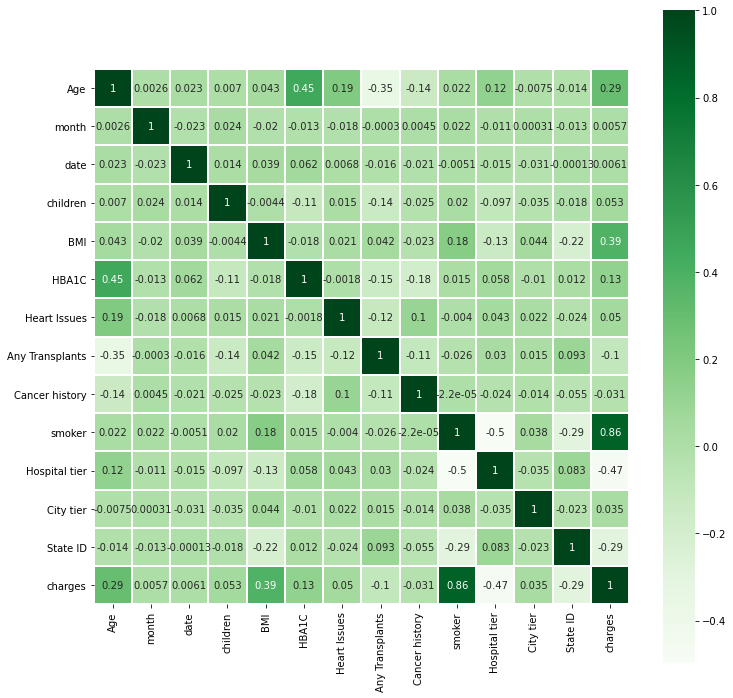

In [76]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(),square=True,annot=True,linewidths=1,cmap='Greens')

### 2.Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions: 
### Note: 

•Perform the stratified 5 fold cross validation technique for model building and validation 

•Use standardization and hyperparameter tuning effectively 

•Use-sklearn pipelines 

•Use appropriate regularization techniques to address the bias variance trade off 

a.Create five folds in the data, and introduce a variable to identify the folds 

b.For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration 

c.Develop five distinct models and five distinct validation scores (root mean squared error values) 

d.Determine the variable importance scores, and identify the redundant variables

In [77]:
# lets first seperate the input and output data.
x = df_copy.drop(["charges",'year','month','date'], axis=1)
y = df_copy[['charges']]

In [78]:
# Lets split the data set into the training and testing data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=.20, random_state=10)

In [79]:
# Now standardize the data.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [80]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [81]:
from sklearn.linear_model import SGDRegressor

In [82]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,
                   0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,
                   9.0,10.0,20,50,100,500,1000],
         'penalty': ['l2', 'l1', 'elasticnet']}

sgd = SGDRegressor()

# Cross Validation 
folds = 5
model_cv = GridSearchCV(estimator = sgd,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
model_cv.best_params_

{'alpha': 100, 'penalty': 'l1'}

In [84]:
sgd = SGDRegressor(alpha= 100, penalty= 'l1')

In [85]:
sgd.fit(x_train, y_train)

SGDRegressor(alpha=100, penalty='l1')

In [86]:
sgd.score(x_test, y_test)

0.8847887628661653

In [87]:
y_pred = sgd.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [89]:
sgd_mae = mean_absolute_error(y_test, y_pred)
sgd_mse = mean_squared_error(y_test, y_pred)
sgd_rmse = sgd_mse*(1/2.0)

In [90]:
print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)

MAE: 2773.1491833821024
MSE: 18602012.22659946
RMSE: 9301006.11329973


In [91]:
# d. Determine the variable importance scores, and identify the redundant variables
importance = sgd.coef_

In [92]:
pd.DataFrame(importance, index = x.columns, columns=['Feature_imp'])

,Feature_imp
Age,3492.558523
Gender,0.000000
children,342.490629
BMI,2756.940516
HBA1C,92.438235
Heart Issues,0.000000
Any Transplants,98.543416
Cancer history,48.380918
NumberOfMajorSurgeries,0.000000
smoker,9567.536728


### 3.Use random forest and extreme gradient boosting for cost prediction, share your cross validation results, and calculate the variable importance scores

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [95]:
score = rf.score(x_test,y_test)
score

0.9242314246873331

In [96]:
y_pred = rf.predict(x_test)

In [97]:
rf_mae = mean_absolute_error(y_test, y_pred)

In [98]:
rf_mae

1975.4772590313314

### Extreme Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
# Instantiate model with 1000 decision trees
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [101]:
score = gbr.score(x_test,y_test)
score

0.9036478452422185

In [102]:
y_pred = gbr.predict(x_test)

In [103]:
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_mae

2480.107156259892

### 4.Case scenario: Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier 1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier 1 hospitals.

In [107]:
import datetime as dt

In [108]:
# First we need to calculate the age of the person.
date = str(19881228)
date1 = pd.to_datetime(date, format = "%Y%m%d")

In [109]:
current_date = dt.datetime.now()
current_date

datetime.datetime(2023, 3, 10, 8, 44, 17, 188860)

In [110]:
age = (current_date - date1)
age

Timedelta('12490 days 08:44:17.188860')

In [111]:
age = int(12421/365)
age

34

In [112]:
# now with the help of height and weight we will calculate the BMI.
height_m = 170/100
height_sq = height_m*height_m
BMI = 85/height_sq
np.round(BMI,2)

29.41

In [113]:
# Now lets gen
list = [[2,1,1,24.41,5.8,0,0,0,0,1,1,34,0]]

In [114]:
dfj = pd.DataFrame(list, columns = ['children', 'Hospital tier', 'City tier', 'BMI', 'HBA1C','Heart Issues', 'Any Transplants', 
                              'Cancer history','NumberOfMajorSurgeries', 'smoker', 'State_ID', 'age', 'gender'] )
dfj

,children,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State_ID,age,gender
0,2,1,1,24.41,5.8,0,0,0,0,1,1,34,0


### 5.Find the predicted hospitalization cost using all five models. The predicted value should be the mean of the five models' predicted values.

In [115]:
Hospital_cost = []

In [116]:
# Now lets predict the hospitalization cost through SGDRegressor
Cost1 = sgd.predict(dfj)
Hospital_cost.append(Cost1)

In [117]:
# Now lets predict the hospitalization cost through Random Forest
Cost2 = rf.predict(dfj)
Hospital_cost.append(Cost2)

In [118]:
# Now lets predict the hospitalization cost throug Extreme gradient Booster
Cost3 = gbr.predict(dfj)
Hospital_cost.append(Cost3)

In [128]:
avg_cost = np.mean(Hospital_cost)
avg_cost

65430.93122271722

The average cost for Ms. Jenya's hospital bills will be: 65,430.93 